# **Task#2: To Explore Supervised Machine Learning**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
Data can be found at http://bit.ly/w data

In [12]:
#importing the Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [9]:
#importing the Data
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

student_data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#Info about the data shape of data, type of individual columns
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
#a brief summary of the dataset
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


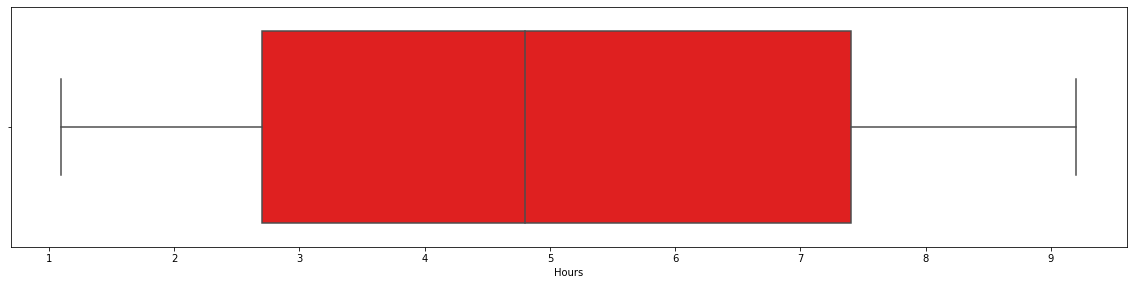

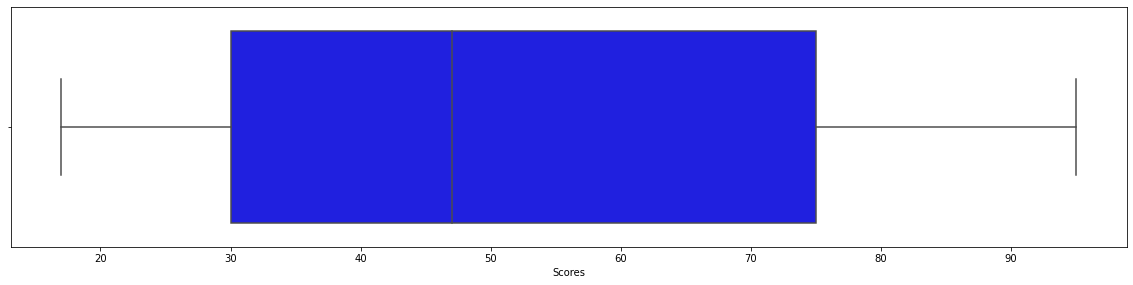

In [14]:
#checking for outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= student_data.Hours, color='red')

plt.figure(figsize= (20,15))
plt.subplot(3,1,2)
sns.boxplot(x= student_data.Scores, color='blue')

There are no outliers present in the data

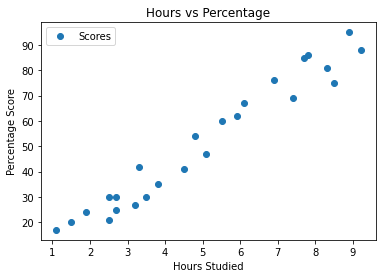

In [16]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [17]:
#Correlation
st = student_data.corr()

In [18]:
st

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [102]:
X = student_data[["Hours"]]
y = student_data[["Scores"]]

In [103]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [104]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Training Complete")

Training Complete


(0.0, 101.91831819340878)

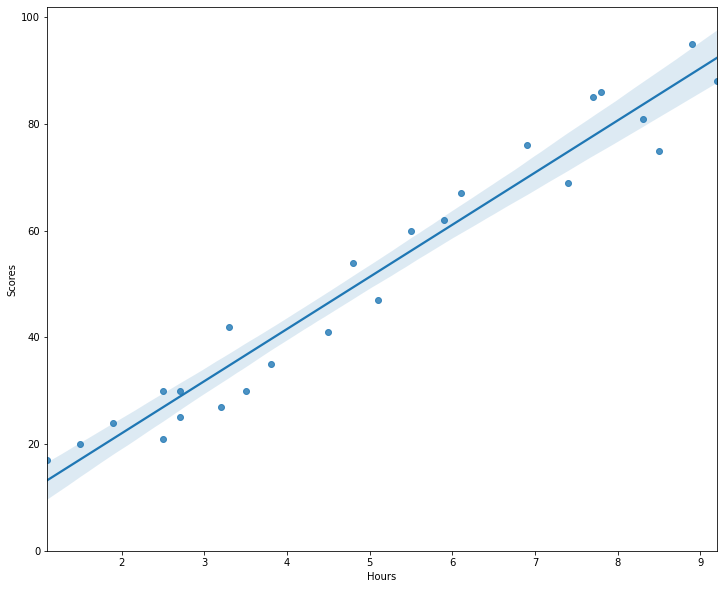

In [89]:
width = 12
height = 10
plt.figure(figsize = (width,height))
sns.regplot(x = "Hours", y = "Scores",data = student_data)
plt.ylim(0,)

In [107]:
print(X_test)
y_pred = lm.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [108]:
lm.intercept_

array([2.01816004])

In [109]:
lm.coef_

array([[9.91065648]])

The Regression Equation will be:
 y = mx + c
 ie, y = 9.91x + 2.01

In [110]:
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [117]:
yp = y_test.Scores.values

In [118]:
type(yp)

numpy.ndarray

In [119]:
df = pd.DataFrame({'Actual': yp.flatten(), 'Predicted': y_pred.flatten()})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [120]:
hours = 9.25

own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


## Evaluating the Model

In [121]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
